In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

In [2]:
data = pd.read_csv("hmelq.csv")
df = data.copy()

In [3]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [7]:
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,reason,job
0,HomeImp,NaN
1,DebtCon,NaN
2,DebtCon,NaN
3,DebtCon,NaN
4,DebtCon,NaN


In [11]:
kat_df.reason.unique()

array(['HomeImp', 'DebtCon', nan], dtype=object)

In [13]:
kat_df.job.unique()

array([nan, 'Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'],
      dtype=object)

In [14]:
df.bad.unique()

array([0, 1], dtype=int64)

In [16]:
df["bad"].value_counts().count()

2

In [17]:
df["bad"].value_counts()

0    2863
1     713
Name: bad, dtype: int64

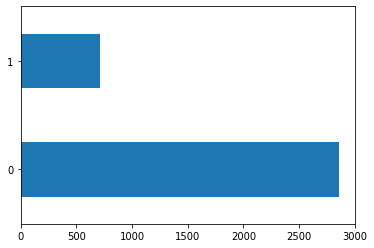

In [18]:
df["bad"].value_counts().plot.barh();

In [20]:
df["bad"].describe()

count    3576.000000
mean        0.199385
std         0.399594
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: bad, dtype: float64

In [21]:
df.groupby("bad").count()

,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,,,,,,,,,,,,
0,2863,2617,2859,2745,2710,2591,2487,2556,2724,2600,2760,2571
1,713,645,653,684,699,673,662,669,673,673,683,238


In [22]:
df.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [23]:
df = df.dropna()

In [24]:
#kategorik değişkenler için dummy uyguluyorum
dms = pd.get_dummies(df[['job', 'reason']])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [25]:
df =  df.drop(["job","reason"], axis = 1)
df.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [27]:
df = pd.concat([df, dms], axis = 1)
df.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,...,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,...,1,0,1,0,0,0,0,0,1,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,...,1,0,1,0,0,0,0,0,1,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,...,1,0,1,0,0,0,0,0,1,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,...,0,1,1,0,0,0,0,0,0,1
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,...,1,0,1,0,0,0,0,0,1,0


# Model

In [28]:
y = df["bad"]
X = df.drop(['bad'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [29]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [30]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = svm_model.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9207920792079208

# Model Tuning

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 19.7min


In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)